In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [41]:
df_train = pd.read_csv("kdd_train.csv")
df_test = pd.read_csv("kdd_test.csv")


In [43]:
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Missing values in Train:", df_train.isnull().sum().sum())
print("Missing values in Test:", df_test.isnull().sum().sum())


Train shape: (125973, 42)
Test shape: (22544, 42)
Missing values in Train: 0
Missing values in Test: 0


In [45]:
df_nsl = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
print("Combined dataset shape:", df_nsl.shape)


Combined dataset shape: (148517, 42)


In [47]:
categorical_cols = df_nsl.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())


Categorical columns: ['protocol_type', 'service', 'flag', 'labels']


In [49]:
le = LabelEncoder()
for col in categorical_cols:
    df_nsl[col] = le.fit_transform(df_nsl[col])


In [64]:
print(df_train.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')


In [51]:
df_nsl['attack_binary'] = df_nsl['labels'].apply(lambda x: 0 if x == df_nsl['labels'].mode()[0] else 1)


In [52]:
df_train_processed = df_nsl.iloc[:len(df_train), :].copy()
df_test_processed  = df_nsl.iloc[len(df_train):, :].copy()


In [66]:
counts = df_train_processed['attack_binary'].value_counts()


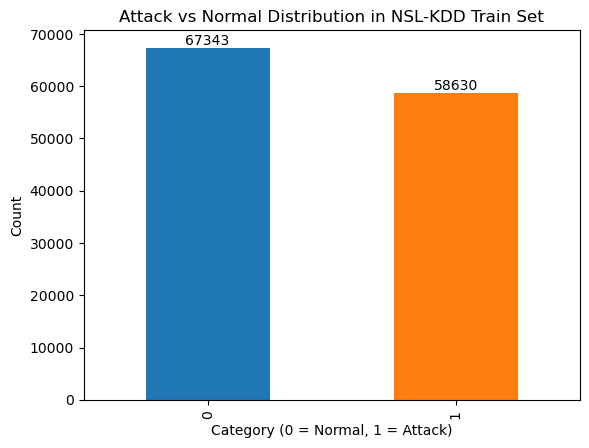

In [68]:
bar_colors = ['#1f77b4', '#ff7f0e']  # blue & orange
ax = counts.plot.bar(color=bar_colors)
ax.bar_label(ax.containers[0])
plt.title('Attack vs Normal Distribution in NSL-KDD Train Set')
plt.xlabel('Category (0 = Normal, 1 = Attack)')
plt.ylabel('Count')
plt.show()

In [53]:
X_train = df_train_processed.drop(['labels', 'attack_binary'], axis=1)
y_train = df_train_processed['attack_binary']

X_test = df_test_processed.drop(['labels', 'attack_binary'], axis=1)
y_test = df_test_processed['attack_binary']


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (125973, 41)
X_test: (22544, 41)
y_train: (125973,)
y_test: (22544,)


KeyError: 'attack_binary'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts (this is fast even with 200,000+ rows)
counts = df_test['protocol_type'].value_counts()

# Plot the counts directly
ax = counts.plot.bar()

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Types of protocols for test data')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts (this is fast even with 200,000+ rows)
counts = df_train['flag'].value_counts()

# Plot the counts directly
ax = counts.plot.bar()

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('flag')
plt.ylabel('Count')
plt.title('Types of flags for train data')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts (this is fast even with 200,000+ rows)
counts = df_test['flag'].value_counts()

# Plot the counts directly
ax = counts.plot.bar()

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('flag')
plt.ylabel('Count')
plt.title('Types of flags for train data')
plt.show()